In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

## Part 1 answer

The AirBnB challenge has two main part that I'd work with:
- Statistical analyis from background data.
- Performing an A/B testing to confirm if the professional pictures are still impacting on higher bookings.

### Satistical Analysis

First I'd gather all past data and I'd cross it with dates of previous launches. For that I'd use pandas and numpy to clean and prepare the data and then matplotlib or tableau to visualizes the data and show the main insights.

Once I'm performing the analysis I'd look for correlation between the companies actions and the converstion rate following that action.
The most important thing would be to see if those apartments with professional pictures are seeing a decrease in booking after:
- 2013's Launch of identity verification for hosts and guests.
- 2014's Launch of double blind reviews (neither host nor guest can see the other’s review), ensuring more honest reviews of properties and hosts.
- 2015's Global PR lift for AirBnB, raising the profile of the company.

In addition I'd also look into those aparments since smartphones have become so popular.
All of these will give me a good idea about how AirBnB customers and hosts work and how they're affected by interternal action and external factors.
If with all that we don't have enough information, I'd cluster the customers database using unsupervised machine learning model such as KMeans to know the companies target better.

Once I'd have all the information I'd need, I'd draw my conclusions to know what to explect from the following A/B test.

### A/B Test

An A/B test is a user experience research methodology that consists in a randomized experiment with two variants. First you send different variants to your clients and then, via statistical hypothesis testing, you decide which one perform best and, therefore, you're going to use. Here's a simplified picture that show's the test.

<img src="data/AB-Testing.png" style="width: 400px">

In our case, first we would pick few demanded apartments randomly, we would make professional pictures of them and we would only show it to a random portion of our clients, we would call this variant A. 
Then we would take smartphone low quality pictures of the same apartments and we would show them to another random sample of our customers, wwe would call this variant B.
Once the test is on going, we might want to do it for different cities and customer clusters (given we performed the KMeans and now we have the customers clustered) to avoid bias in our results.

Once certain amount of time has past (depending on the circumstances, for example now we would need to wait a lot since people is not travelling), we would look at the results and using statistical hypothesis testing we would decide if the difference between professional photos and regular smartphone pictures is big enough to explain the resources consumpiton that the service mean to the company. The null hypothesis would be that it's worth it and we would try to reject it. In doing so we would accept that this is not worth the money expenditure and we'd proceed to stop the service from now on.

## Part 2 answer

In [2]:
data = pd.read_json('data/intervals_challenge.json',lines=True)
data

duration distance                    started_at  \
0           857     5384 2016-10-03 13:00:00.286999941   
1           245     1248 2016-10-03 13:00:00.852999926   
2          1249     5847 2016-10-03 13:00:01.670000076   
3           471     2585 2016-10-03 13:00:01.841000080   
4           182      743 2016-10-03 13:00:01.970000029   
...         ...      ...                           ...   
165165       NA       NA 2016-10-04 20:36:10.846999884   
165166       NA       NA 2016-10-04 20:36:12.719000101   
165167       NA       NA 2016-10-04 20:36:14.763000011   
165168       NA       NA 2016-10-04 20:36:15.957999945   
165169       NA       NA 2016-10-04 20:36:20.473999977   

                                 trip_id                        vehicle_id  \
0       c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1       427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
2       757867f6d7c00ef92a65bfaa3895943f  8885c59374cc539163e83f01ed59fd16   
3       d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4       00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   
...                                  ...                               ...   
165165  d2f81b419daddb90bd701ab9870f47a3  05e4532a59b7bfe65894335d1bc83e4d   
165166  73a07d4504036997306e0e3330529294  bed6dd187f23b3e8d956bb0d1ab0524a   
165167  d98c047d565bd488b17e08594965c479  31cd2f19d27c0c0c0ca386de72866a81   
165168  ce9a7ae5f76667c9f92b149a1b345a2d  4a555013634506246eed5d801ffbe526   
165169  469dff3624a9a37bb986157750fb73e8  27b7111eb7046e253c9896eee617b02e   

         city_id                    type  
0         pentos  driving_to_destination  
1       volantis         going_to_pickup  
2         pentos  driving_to_destination  
3         bravos         going_to_pickup  
4         pentos         going_to_pickup  
...          ...                     ...  
165165  volantis  driving_to_destination  
165166  volantis       waiting_for_rider  
165167    bravos  driving_to_destination  
165168  volantis  driving_to_destination  
165169  volantis         going_to_pickup  

[165170 rows x 7 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165170 entries, 0 to 165169
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   duration    165170 non-null  object        
 1   distance    165170 non-null  object        
 2   started_at  165170 non-null  datetime64[ns]
 3   trip_id     165170 non-null  object        
 4   vehicle_id  165170 non-null  object        
 5   city_id     165170 non-null  object        
 6   type        165170 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 8.8+ MB


In [4]:
#keeping only the data with distances
data2 = data[data.duration != 'NA']
data2.head()

duration distance                    started_at  \
0      857     5384 2016-10-03 13:00:00.286999941   
1      245     1248 2016-10-03 13:00:00.852999926   
2     1249     5847 2016-10-03 13:00:01.670000076   
3      471     2585 2016-10-03 13:00:01.841000080   
4      182      743 2016-10-03 13:00:01.970000029   

                            trip_id                        vehicle_id  \
0  c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1  427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
2  757867f6d7c00ef92a65bfaa3895943f  8885c59374cc539163e83f01ed59fd16   
3  d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4  00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   

    city_id                    type  
0    pentos  driving_to_destination  
1  volantis         going_to_pickup  
2    pentos  driving_to_destination  
3    bravos         going_to_pickup  
4    pentos         going_to_pickup

In [5]:
#tranforming duration and distance to ints
cols = ['duration','distance']
data2[cols] = data2[cols].astype(int)

C:\Users\Andreu\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Here we separete the time into two columns to have time and date separated and be able to filter by those features. 

In [6]:
data2['start_date'] = [i.date() for i in data2['started_at']]
data2['start_time'] = [i.time() for i in data2['started_at']]    

C:\Users\Andreu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Andreu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
data2.head()

duration  distance                    started_at  \
0       857      5384 2016-10-03 13:00:00.286999941   
1       245      1248 2016-10-03 13:00:00.852999926   
2      1249      5847 2016-10-03 13:00:01.670000076   
3       471      2585 2016-10-03 13:00:01.841000080   
4       182       743 2016-10-03 13:00:01.970000029   

                            trip_id                        vehicle_id  \
0  c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1  427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
2  757867f6d7c00ef92a65bfaa3895943f  8885c59374cc539163e83f01ed59fd16   
3  d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4  00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   

    city_id                    type  start_date       start_time  
0    pentos  driving_to_destination  2016-10-03  13:00:00.286999  
1  volantis         going_to_pickup  2016-10-03  13:00:00.852999  
2    pentos  driving_to_destination  2016-10-03  13:00:01.670000  
3    bravos         going_to_pickup  2016-10-03  13:00:01.841000  
4    pentos         going_to_pickup  2016-10-03  13:00:01.970000

In [8]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164013 entries, 0 to 165162
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   duration    164013 non-null  int32         
 1   distance    164013 non-null  int32         
 2   started_at  164013 non-null  datetime64[ns]
 3   trip_id     164013 non-null  object        
 4   vehicle_id  164013 non-null  object        
 5   city_id     164013 non-null  object        
 6   type        164013 non-null  object        
 7   start_date  164013 non-null  object        
 8   start_time  164013 non-null  object        
dtypes: datetime64[ns](1), int32(2), object(6)
memory usage: 11.3+ MB


In [9]:
data2.describe()

duration      distance
count  164013.000000  1.640130e+05
mean      432.959534  1.944164e+03
std       559.097970  7.230917e+03
min         0.000000  0.000000e+00
25%        55.000000  1.900000e+01
50%       246.000000  6.080000e+02
75%       616.000000  2.349000e+03
max     48654.000000  1.218089e+06

In [10]:
data2['distance_type'] = np.where(data2.trip_id.str.startswith(tuple(str(i) for i in range(9))),'road','linear')

C:\Users\Andreu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data2.head()

duration  distance                    started_at  \
0       857      5384 2016-10-03 13:00:00.286999941   
1       245      1248 2016-10-03 13:00:00.852999926   
2      1249      5847 2016-10-03 13:00:01.670000076   
3       471      2585 2016-10-03 13:00:01.841000080   
4       182       743 2016-10-03 13:00:01.970000029   

                            trip_id                        vehicle_id  \
0  c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1  427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
2  757867f6d7c00ef92a65bfaa3895943f  8885c59374cc539163e83f01ed59fd16   
3  d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4  00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   

    city_id                    type  start_date       start_time distance_type  
0    pentos  driving_to_destination  2016-10-03  13:00:00.286999        linear  
1  volantis         going_to_pickup  2016-10-03  13:00:00.852999          road  
2    pentos  driving_to_destination  2016-10-03  13:00:01.670000          road  
3    bravos         going_to_pickup  2016-10-03  13:00:01.841000        linear  
4    pentos         going_to_pickup  2016-10-03  13:00:01.970000          road

Now that the data is a bit more clear, I'll remove both extremes to make it a more representative one. To do so I'll use  the quintile function.

In [12]:
def extreme_values(data, column):
    bottom = data[column].quantile(0.05)
    top = data[column].quantile(0.95)
    df_clean = data.loc[(data[column] > bottom) & (data[column] < top)]
    return df_clean

Now we pass our parameters into the function.

In [13]:
data_clean = extreme_values(data2, 'duration')
data_clean = extreme_values(data_clean, 'distance')
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127379 entries, 0 to 165148
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   duration       127379 non-null  int32         
 1   distance       127379 non-null  int32         
 2   started_at     127379 non-null  datetime64[ns]
 3   trip_id        127379 non-null  object        
 4   vehicle_id     127379 non-null  object        
 5   city_id        127379 non-null  object        
 6   type           127379 non-null  object        
 7   start_date     127379 non-null  object        
 8   start_time     127379 non-null  object        
 9   distance_type  127379 non-null  object        
dtypes: datetime64[ns](1), int32(2), object(7)
memory usage: 9.7+ MB


We can see that now we have less data but, we kept the more meaningfull data.

Now I asked myself what else do we need to answer our challenge. First we need to create a column (trip_length) that will tell us the amount of meters the vehicle travels in one second.

In [16]:
data_clean['trip_length'] = round(data_clean.distance/data_clean.duration)

In [17]:
data_clean.head()

duration  distance                    started_at  \
0       857      5384 2016-10-03 13:00:00.286999941   
1       245      1248 2016-10-03 13:00:00.852999926   
3       471      2585 2016-10-03 13:00:01.841000080   
4       182       743 2016-10-03 13:00:01.970000029   
5       599      1351 2016-10-03 13:00:02.154000044   

                            trip_id                        vehicle_id  \
0  c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1  427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
3  d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4  00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   
5  158e7bc8d42e1d8c94767b00c8f89568  126e868fb282852c2fa95d88878686bf   

    city_id                    type  start_date       start_time  \
0    pentos  driving_to_destination  2016-10-03  13:00:00.286999   
1  volantis         going_to_pickup  2016-10-03  13:00:00.852999   
3    bravos         going_to_pickup  2016-10-03  13:00:01.841000   
4    pentos         going_to_pickup  2016-10-03  13:00:01.970000   
5  volantis         going_to_pickup  2016-10-03  13:00:02.154000   

  distance_type  trip_length  
0        linear          6.0  
1          road          5.0  
3        linear          5.0  
4          road          4.0  
5          road          2.0

In order to be able to visualize the situation and draw the adecuate conclusions, we need to change the structure of our dataset. To do that I'll use the .pivot() function and rearenge the columns and what I want to show from them. Then we will separate the descriptive statistics columns to be able to visualize the results properly.

In [51]:
df_final = pd.pivot_table(data_clean, values=['duration', 'distance','trip_length'], index=['city_id','vehicle_id','started_at', 'trip_id', 'type', 'distance_type'], 
                          aggfunc={'duration':[np.mean, max, min],
                                  'distance':[np.mean, max, min],
                                  'trip_length':[np.mean,max,min]}).reset_index()
df_final.columns = ['_'.join(col) for col in df_final.columns]


In [52]:
df_final.head()

city_id_                       vehicle_id_                   started_at_  \
0   bravos  00533c566a32c599616cf88af15d80dd 2016-10-03 18:35:57.983999968   
1   bravos  00533c566a32c599616cf88af15d80dd 2016-10-03 18:45:10.826999903   
2   bravos  00533c566a32c599616cf88af15d80dd 2016-10-03 23:49:49.385999918   
3   bravos  00533c566a32c599616cf88af15d80dd 2016-10-03 23:52:49.734999895   
4   bravos  00533c566a32c599616cf88af15d80dd 2016-10-03 23:53:14.690999985   

                           trip_id_                   type_ distance_type_  \
0  1fa4cdb3c8ebbc505633abe3042fad6d         going_to_pickup           road   
1  1fa4cdb3c8ebbc505633abe3042fad6d       waiting_for_rider           road   
2  45f9afaac3d8b5a4886e66f72c4e7824         going_to_pickup           road   
3  45f9afaac3d8b5a4886e66f72c4e7824       waiting_for_rider           road   
4  45f9afaac3d8b5a4886e66f72c4e7824  driving_to_destination           road   

   distance_max  distance_mean  distance_min  duration_max  duration_mean  \
0          2069           2069          2069           553            553   
1             1              1             1             9              9   
2           858            858           858           180            180   
3             2              2             2            25             25   
4          2966           2966          2966           637            637   

   duration_min  trip_length_max  trip_length_mean  trip_length_min  
0           553              4.0               4.0              4.0  
1             9              0.0               0.0              0.0  
2           180              5.0               5.0              5.0  
3            25              0.0               0.0              0.0  
4           637              5.0               5.0              5.0

In [53]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127379 entries, 0 to 127378
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   city_id_          127379 non-null  object        
 1   vehicle_id_       127379 non-null  object        
 2   started_at_       127379 non-null  datetime64[ns]
 3   trip_id_          127379 non-null  object        
 4   type_             127379 non-null  object        
 5   distance_type_    127379 non-null  object        
 6   distance_max      127379 non-null  int32         
 7   distance_mean     127379 non-null  int32         
 8   distance_min      127379 non-null  int32         
 9   duration_max      127379 non-null  int32         
 10  duration_mean     127379 non-null  int32         
 11  duration_min      127379 non-null  int32         
 12  trip_length_max   127379 non-null  float64       
 13  trip_length_mean  127379 non-null  float64       
 14  trip

### Visualization

Now I'll proceed to Viualize the data to find meaningfull insights.

In [23]:
df_final.head()

city_id_                       vehicle_id_  \
0   bravos  00533c566a32c599616cf88af15d80dd   
1   bravos  00533c566a32c599616cf88af15d80dd   
2   bravos  00533c566a32c599616cf88af15d80dd   
3   bravos  00533c566a32c599616cf88af15d80dd   
4   bravos  00533c566a32c599616cf88af15d80dd   

                           trip_id_                   type_ distance_type_  \
0  115592df48204cb0daae75da35d4b4d8  driving_to_destination           road   
1  115592df48204cb0daae75da35d4b4d8         going_to_pickup           road   
2  115592df48204cb0daae75da35d4b4d8       waiting_for_rider           road   
3  1ef30c6bd4a97737c76aac74ec9d7c2e  driving_to_destination           road   
4  1ef30c6bd4a97737c76aac74ec9d7c2e         going_to_pickup           road   

   distance_max  distance_mean  distance_min  duration_max  duration_mean  \
0        4434.0         4434.0        4434.0         667.0          667.0   
1        1116.0         1116.0        1116.0         237.0          237.0   
2           2.0            2.0           2.0         207.0          207.0   
3        2495.0         2495.0        2495.0         445.0          445.0   
4         819.0          819.0         819.0         173.0          173.0   

   duration_min  trip_length_max  trip_length_mean  trip_length_min  
0         667.0              7.0               7.0              7.0  
1         237.0              5.0               5.0              5.0  
2         207.0              0.0               0.0              0.0  
3         445.0              6.0               6.0              6.0  
4         173.0              5.0               5.0              5.0

In [24]:
data_clean.head()

duration  distance                    started_at  \
0       857      5384 2016-10-03 13:00:00.286999941   
1       245      1248 2016-10-03 13:00:00.852999926   
3       471      2585 2016-10-03 13:00:01.841000080   
4       182       743 2016-10-03 13:00:01.970000029   
5       599      1351 2016-10-03 13:00:02.154000044   

                            trip_id                        vehicle_id  \
0  c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1  427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
3  d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4  00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   
5  158e7bc8d42e1d8c94767b00c8f89568  126e868fb282852c2fa95d88878686bf   

    city_id                    type  start_date       start_time  \
0    pentos  driving_to_destination  2016-10-03  13:00:00.286999   
1  volantis         going_to_pickup  2016-10-03  13:00:00.852999   
3    bravos         going_to_pickup  2016-10-03  13:00:01.841000   
4    pentos         going_to_pickup  2016-10-03  13:00:01.970000   
5  volantis         going_to_pickup  2016-10-03  13:00:02.154000   

  distance_type  trip_length  
0        linear          6.0  
1          road          5.0  
3        linear          5.0  
4          road          4.0  
5          road          2.0

[Text(0, 0.5, 'Mean Distance'), Text(0.5, 0, 'Mean Duration')]

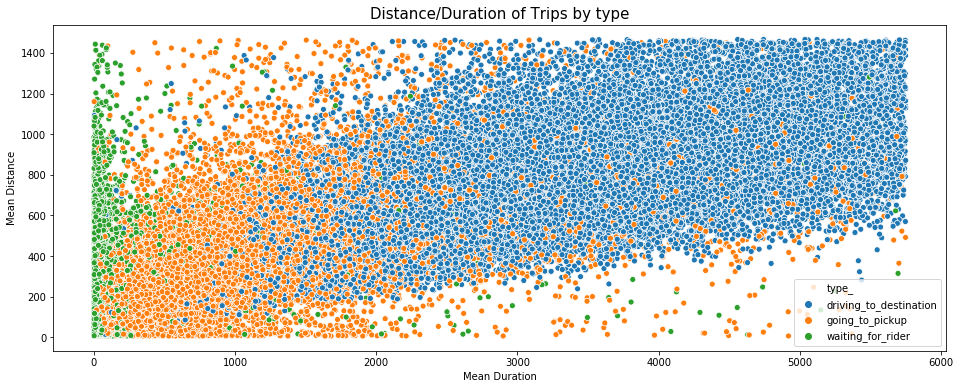

In [25]:
plt.figure(figsize = (16,6))
ax = sns.scatterplot(x = 'distance_mean', y = 'duration_mean', hue = 'type_',
                    data = df_final)

ax.set_title('Distance/Duration of Trips by type', fontsize = 15)
ax.set(xlabel='Mean Duration',ylabel= 'Mean Distance')

Here we can appreciate that the longer distances (both in meters and seconds) are mostly __driving to destination__ .

[Text(0, 0.5, 'Distance'), Text(0.5, 0, 'Duration')]

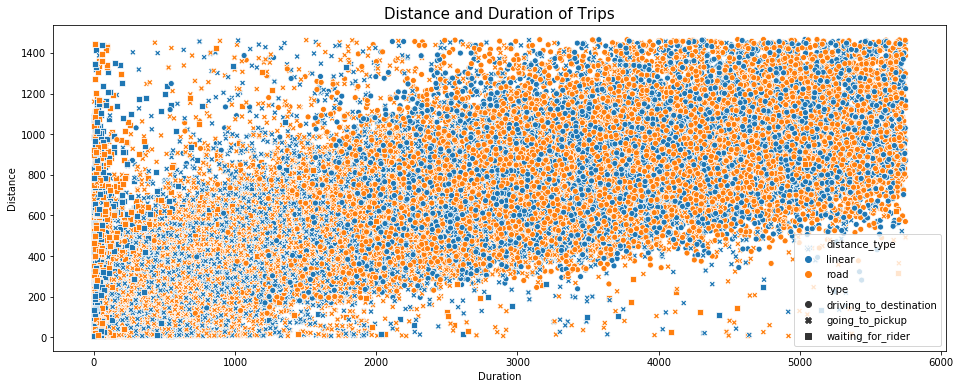

In [26]:
plt.figure(figsize = (16,6))
ax = sns.scatterplot(x = 'distance', y = 'duration', hue = 'distance_type',
                    data = data_clean, style='type')

ax.set_title('Distance and Duration of Trips', fontsize = 15)
ax.set(xlabel='Duration',ylabel= 'Distance')

Here we find it don't find many conclusions aside from the fact that both linear and road distances are equally spread (one doesn't tend to be higher than the other. Below we try to plot them separately.

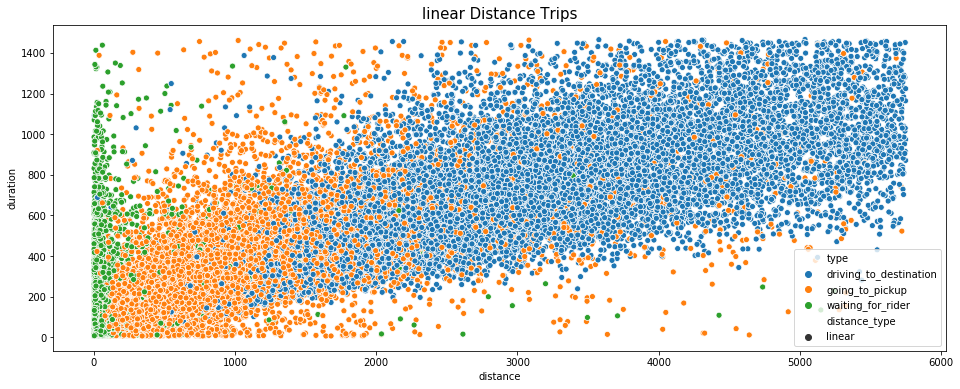

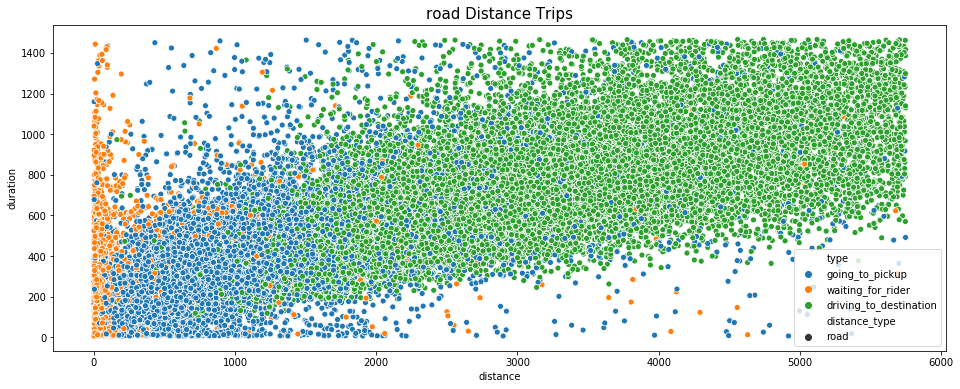

In [27]:
#Now the plots separated by distance type
distances = ['linear','road']
for i in distances:
        plt.figure(figsize = (16,6))
        ax = sns.scatterplot(x = 'distance', y = 'duration', hue = 'type',
                             style = 'distance_type',
        data = data_clean.loc[data_clean['distance_type'] == i])
        ax.set_title(f'{i} Distance Trips', fontsize = 15)


even the legend are different we can see that both distances have a similar duration/distance ratio

Now the same but we separate by city

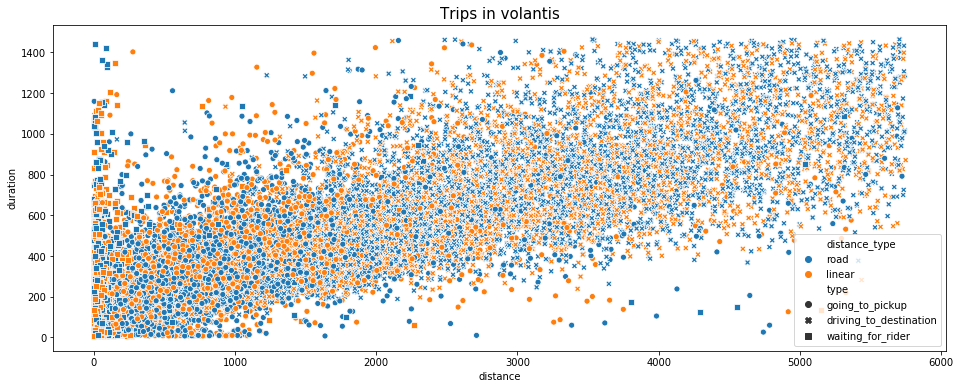

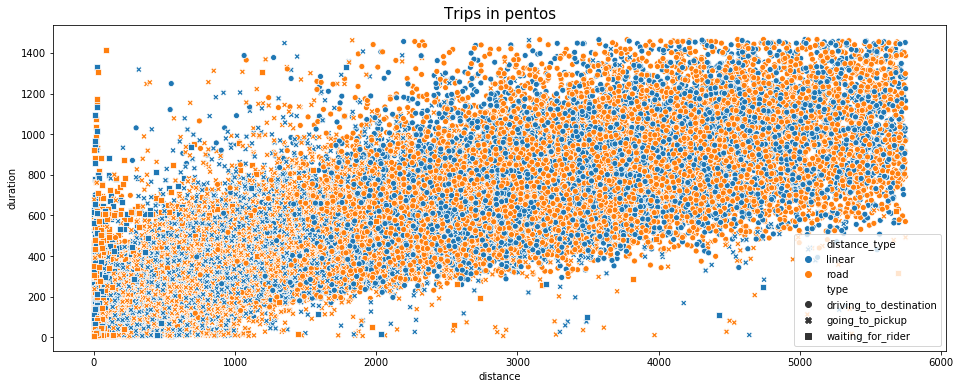

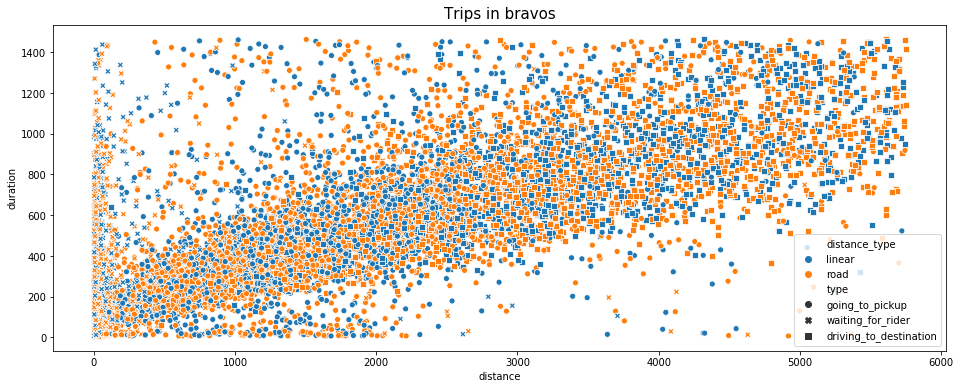

In [28]:
cities = ['volantis','pentos', 'bravos']
for i in cities:
        plt.figure(figsize = (16,6))
        ax = sns.scatterplot(x = 'distance', y = 'duration', hue = 'distance_type',
                             style = 'type',
        data = data_clean.loc[data_clean['city_id'] == i])
        ax.set_title(f'Trips in {i}', fontsize = 15)

We can see that there's much more the trafic in Pentos, then Volantis and then Bravos. let's group by to check this out.

In [29]:
data_clean.head()

duration  distance                    started_at  \
0       857      5384 2016-10-03 13:00:00.286999941   
1       245      1248 2016-10-03 13:00:00.852999926   
3       471      2585 2016-10-03 13:00:01.841000080   
4       182       743 2016-10-03 13:00:01.970000029   
5       599      1351 2016-10-03 13:00:02.154000044   

                            trip_id                        vehicle_id  \
0  c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1  427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
3  d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4  00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   
5  158e7bc8d42e1d8c94767b00c8f89568  126e868fb282852c2fa95d88878686bf   

    city_id                    type  start_date       start_time  \
0    pentos  driving_to_destination  2016-10-03  13:00:00.286999   
1  volantis         going_to_pickup  2016-10-03  13:00:00.852999   
3    bravos         going_to_pickup  2016-10-03  13:00:01.841000   
4    pentos         going_to_pickup  2016-10-03  13:00:01.970000   
5  volantis         going_to_pickup  2016-10-03  13:00:02.154000   

  distance_type  trip_length  
0        linear          6.0  
1          road          5.0  
3        linear          5.0  
4          road          4.0  
5          road          2.0

In [30]:
bd_data = data_clean.groupby(['city_id', 'type', 'distance_type']).agg({'trip_length':'mean','distance':'mean','duration':'mean'})
bd_data

trip_length     distance  \
city_id  type                   distance_type                             
bravos   driving_to_destination linear            4.396850  3408.017323   
                                road              4.422289  3378.431325   
         going_to_pickup        linear            5.941659  1607.600273   
                                road              6.325052  1623.964311   
         waiting_for_rider      linear            1.005947    91.926933   
                                road              1.474675   106.231169   
pentos   driving_to_destination linear            4.350424  2843.451783   
                                road              4.380283  2867.260728   
         going_to_pickup        linear            3.027301   700.987952   
                                road              3.199506   706.901002   
         waiting_for_rider      linear            0.756925    48.349977   
                                road              0.753033    47.295637   
volantis driving_to_destination linear            4.379718  3070.537906   
                                road              4.371054  3107.883681   
         going_to_pickup        linear            3.265835   816.611045   
                                road              3.362898   800.250443   
         waiting_for_rider      linear            0.685272    53.235373   
                                road              0.717195    64.377074   

                                                 duration  
city_id  type                   distance_type              
bravos   driving_to_destination linear         798.201575  
                                road           787.035542  
         going_to_pickup        linear         505.896080  
                                road           501.582575  
         waiting_for_rider      linear         195.167375  
                                road           186.757792  
pentos   driving_to_destination linear         679.894482  
                                road           682.271212  
         going_to_pickup        linear         254.808297  
                                road           254.101606  
         waiting_for_rider      linear          78.088560  
                                road            78.339908  
volantis driving_to_destination linear         739.673121  
                                road           749.653473  
         going_to_pickup        linear         301.645289  
                                road           291.765496  
         waiting_for_rider      linear         140.342972  
                                road           138.922574

In [31]:
data_clean.groupby(['city_id','distance_type']).agg({'trip_length':'mean','distance':'mean','duration':'mean'})

trip_length     distance    duration
city_id  distance_type                                      
bravos   linear            4.267184  1715.892049  507.081232
         road              4.570650  1718.897656  499.770386
pentos   linear            2.800984  1162.458046  333.436181
         road              2.880864  1172.288671  333.968291
volantis linear            2.879256  1231.804389  378.856317
         road              2.934373  1242.392012  377.670118

In [38]:
data_clean.columns

Index(['duration', 'distance', 'started_at', 'trip_id', 'vehicle_id',
       'city_id', 'type', 'start_date', 'start_time', 'distance_type',
       'trip_length'],
      dtype='object')

In [35]:
df_final.groupby(['city_id_','distance_type_']).agg({'trip_length_mean':'mean','distance_mean':'mean','duration_mean':'mean'})

trip_length_mean  distance_mean  duration_mean
city_id_ distance_type_                                                
bravos   linear                  4.267184    1715.892049     507.081232
         road                    4.570650    1718.897656     499.770386
pentos   linear                  2.800984    1162.458046     333.436181
         road                    2.880864    1172.288671     333.968291
volantis linear                  2.879200    1231.900334     378.885522
         road                    2.934373    1242.392012     377.670118

From this we would say that the type of distance doesn't impact significantly the duration of the trip, because the mean duration and distances and so similar in all three cities. (volantis has a slight increase with the road distance, but I don't think it's significant)

Although, in cities like the one from our example, there are rush hours where traffic increases and the duration is higher for the same distance, lets check it out.

Text(0.5, 1.0, 'Rush hours')

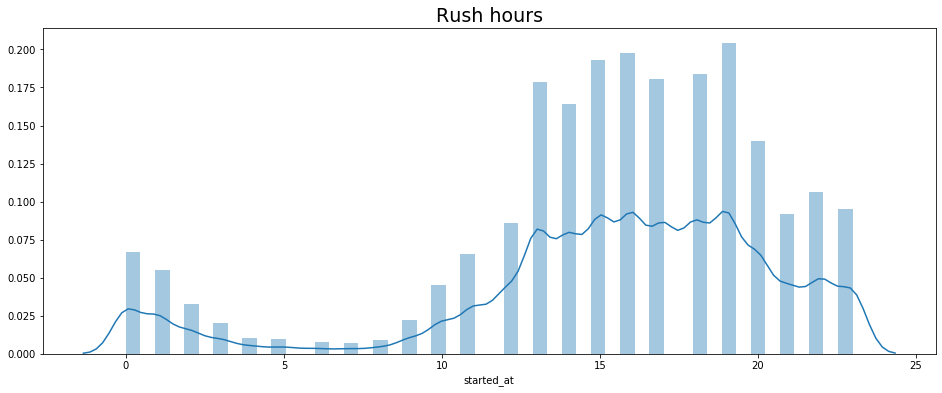

In [37]:
plt.figure(figsize = (16,6))
ax = sns.distplot(data_clean.started_at.dt.hour)
ax.set_title('Rush hours', fontsize = 19)

Here we can clearly see that there are rush hours in which the same distances will take longer to travel. In this case 16:00 and 19:00

In [56]:
df_final.started_at_.dt.hour

0         18
1         18
2         23
3         23
4         23
          ..
127374    19
127375    12
127376    12
127377    19
127378    19
Name: started_at_, Length: 127379, dtype: int64

In [57]:
rush_hours = df_final[(df_final.started_at_.dt.hour == 16) | (data_clean.started_at.dt.hour == 19)]
rush_hours.head()

C:\Users\Andreu\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


city_id_                       vehicle_id_                   started_at_  \
13   bravos  00533c566a32c599616cf88af15d80dd 2016-10-04 16:49:23.733000040   
36   bravos  0342877c0b84d2cc5deca99c9a3875c0 2016-10-03 16:43:19.256999969   
74   bravos  03d01c6833fe2806739fedd47e3b738d 2016-10-03 16:25:07.078999996   
92   bravos  03d01c6833fe2806739fedd47e3b738d 2016-10-04 16:50:38.473999977   
93   bravos  03d01c6833fe2806739fedd47e3b738d 2016-10-04 16:57:00.687000036   

                            trip_id_              type_ distance_type_  \
13  ad29a45552650175d6722d114b15c713    going_to_pickup         linear   
36  a94b0fdc581bde98e9f9c27886848dd9    going_to_pickup         linear   
74  2442f490df2761ed81dd1cd9e80e48ec    going_to_pickup           road   
92  4b28d804c8508d34f1f57850383a947d    going_to_pickup           road   
93  4b28d804c8508d34f1f57850383a947d  waiting_for_rider           road   

    distance_max  distance_mean  distance_min  duration_max  duration_mean  \
13          1973           1973          1973           641            641   
36          1703           1703          1703           638            638   
74          1434           1434          1434           295            295   
92           828            828           828           382            382   
93            51             51            51           387            387   

    duration_min  trip_length_max  trip_length_mean  trip_length_min  
13           641              3.0               3.0              3.0  
36           638              3.0               3.0              3.0  
74           295              5.0               5.0              5.0  
92           382              2.0               2.0              2.0  
93           387              0.0               0.0              0.0

Now that we have only the trips on rush hour, let's groupd them again.

In [58]:
rush_hours.groupby(['city_id_','distance_type_']).agg({'trip_length_mean':'mean','distance_mean':'mean','duration_mean':'mean'})

trip_length_mean  distance_mean  duration_mean
city_id_ distance_type_                                                
bravos   linear                  4.008982    1795.685629     590.098802
         road                    4.127182    1738.635910     558.266833
pentos   linear                  2.832603    1183.936902     345.999513
         road                    3.023544    1203.669651     350.200245
volantis linear                  2.559775    1219.614627     401.040788
         road                    2.614512    1202.066893     385.340136

Here we can see how in rush hours the road is a little bit higher except in volantis.

## Conclusions

1. The company should move to a hybrid model where they use linear distance most of the time but during those rush hours it might be worth it to move towards a live road API. Although I would need data from a longer period of time and maybe even perform some more test to identify the traffic hubs of the cities so we can use road distance if the trip goes through there or linear if it doesn't, for example.

2. I already answered a bit how I would improve it by gathering more data to make a specific case for each city. Knowing which spot and when the traffic is more intens than others, then deciding on a threshold and saying, any trip passing a high density spot, in rush hour,will use road distance and the request will be worth it, but if not, then linear distance works just fine and it demands less resources to the company.
